### <div align="center">Model Optimization: Regularization Technique</div>

#### 8.1: Regularization
- Regularization is a set of techniques used to prevent overfitting — which is when a model performs well on training data but poorly on new, unseen data.
- Regularization Techniques
  1. Dropout Regularization
  2. L1, L2 Regularization
  3. Batch Normalization
  4. Early Stopping

#### 8.2: Dropout Regularization
- Dropout regularization drops certain neurons in each hidden layer during the training process. This generalizes the model and stops the network from learning specific details of training samples.
- Dropout ratio can be 50%, 20%, 30% etc. based on the situation. In PyTorch one can add a dropout layer after activation layer using nn.Dropout(p=0.5), where p indicates the percentage of neurons being dropped out. 0.5 means drop 50% of the neurons.

In [1]:
import pandas as pd
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Data Loadings
Dataset Credits
@dataset{sonar-mines-vs-rocks,
  author = {Gorman, R Paul and Sejnowski, Terrence J.},
  title = {Connectionist Bench (Sonar, Mines vs. Rocks)},
  year = {1988},
  publisher = {University of California, Irvine. Machine Learning Repository},
  url = {https://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks}
}

In [2]:
df = pd.read_csv("../../data/sonar.all-data", header=None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
18,0.0270,0.0092,0.0145,0.0278,0.0412,0.0757,0.1026,0.1138,0.0794,0.1520,...,0.0084,0.0010,0.0018,0.0068,0.0039,0.0120,0.0132,0.0070,0.0088,R
28,0.0100,0.0275,0.0190,0.0371,0.0416,0.0201,0.0314,0.0651,0.1896,0.2668,...,0.0088,0.0104,0.0036,0.0088,0.0047,0.0117,0.0020,0.0091,0.0058,R
103,0.0162,0.0253,0.0262,0.0386,0.0645,0.0472,0.1056,0.1388,0.0598,0.1334,...,0.0071,0.0082,0.0232,0.0198,0.0074,0.0035,0.0100,0.0048,0.0019,M
175,0.0294,0.0123,0.0117,0.0113,0.0497,0.0998,0.1326,0.1117,0.2984,0.3473,...,0.0056,0.0104,0.0079,0.0014,0.0054,0.0015,0.0006,0.0081,0.0043,M
192,0.0056,0.0267,0.0221,0.0561,0.0936,0.1146,0.0706,0.0996,0.1673,0.1859,...,0.0072,0.0055,0.0074,0.0068,0.0084,0.0037,0.0024,0.0034,0.0007,M


In [3]:
df.shape

(208, 61)

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [5]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [6]:
df[60] = df[60].map({'M': 0, 'R': 1})
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1


In [7]:
X = df.drop(60, axis=1)
y = df[60]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [8]:
X_train.shape

(156, 60)

In [9]:
y_train.values

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1], dtype=int64)

In [10]:
# Convert the split arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [11]:
# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

##### Train a Neural Network Without Dropout Regularization

In [21]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(60, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # Final output layer without activation for raw logits
        )

    def forward(self, x):
        return self.network(x)

In [15]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(60, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # Final output layer without activation for raw logits
        )

    def forward(self, x):
        return self.network(x)

In [16]:
# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=20):
    train_losses, val_losses, val_accuracies = [], [], []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        y_pred, y_true = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                y_pred.extend(predicted.cpu().numpy())
                y_true.extend(labels.cpu().numpy())
        val_losses.append(val_loss / len(val_loader))
        val_accuracy = accuracy_score(y_true, y_pred)
        val_accuracies.append(val_accuracy)
        
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}")
    
    return train_losses, val_losses, val_accuracies

Epoch 1/20, Train Loss: 0.6985, Val Loss: 0.6709, Val Accuracy: 0.5192
Epoch 2/20, Train Loss: 0.6802, Val Loss: 0.6621, Val Accuracy: 0.5192
Epoch 3/20, Train Loss: 0.6699, Val Loss: 0.6532, Val Accuracy: 0.6538
Epoch 4/20, Train Loss: 0.6552, Val Loss: 0.6291, Val Accuracy: 0.6346
Epoch 5/20, Train Loss: 0.6380, Val Loss: 0.6244, Val Accuracy: 0.7500
Epoch 6/20, Train Loss: 0.6094, Val Loss: 0.5839, Val Accuracy: 0.6923
Epoch 7/20, Train Loss: 0.5697, Val Loss: 0.5831, Val Accuracy: 0.7885
Epoch 8/20, Train Loss: 0.5543, Val Loss: 0.5530, Val Accuracy: 0.7500
Epoch 9/20, Train Loss: 0.5201, Val Loss: 0.5227, Val Accuracy: 0.7115
Epoch 10/20, Train Loss: 0.4830, Val Loss: 0.5165, Val Accuracy: 0.7308
Epoch 11/20, Train Loss: 0.4467, Val Loss: 0.5112, Val Accuracy: 0.7885
Epoch 12/20, Train Loss: 0.4157, Val Loss: 0.4803, Val Accuracy: 0.7115
Epoch 13/20, Train Loss: 0.3875, Val Loss: 0.4966, Val Accuracy: 0.7500
Epoch 14/20, Train Loss: 0.3756, Val Loss: 0.4811, Val Accuracy: 0.7308
E

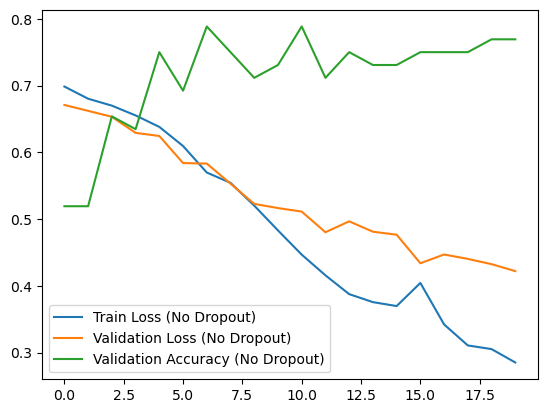

In [17]:
# Initialize and train the model without dropout
model_without_dropout = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_without_dropout.parameters(), lr=0.001)

train_losses_no_dropout, val_losses_no_dropout, val_accuracies_no_dropout = train_model(
    model_without_dropout, train_loader, test_loader, criterion, optimizer, epochs=20
)

# Plot training and validation loss and accuracy (Without Dropout)
plt.plot(train_losses_no_dropout, label="Train Loss (No Dropout)")
plt.plot(val_losses_no_dropout, label="Validation Loss (No Dropout)")
plt.plot(val_accuracies_no_dropout, label="Validation Accuracy (No Dropout)")
plt.legend()
plt.show()

##### Train a Neural Network With Dropout Regularization

In [18]:
# Model with Dropout using nn.Sequential
class SimpleNNWithDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(60, 128),
            nn.ReLU(),
            nn.Dropout(p=0.5),  # Dropout layer after the first ReLU
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(p=0.5),  # Dropout layer after the second ReLU
            nn.Linear(64, 2)  # Final output layer without activation for raw logits
        )

    def forward(self, x):
        return self.network(x)

Epoch 1/20, Train Loss: 0.6954, Val Loss: 0.6881, Val Accuracy: 0.6731
Epoch 2/20, Train Loss: 0.6908, Val Loss: 0.6616, Val Accuracy: 0.5192
Epoch 3/20, Train Loss: 0.6681, Val Loss: 0.6524, Val Accuracy: 0.5192
Epoch 4/20, Train Loss: 0.6760, Val Loss: 0.6489, Val Accuracy: 0.5385
Epoch 5/20, Train Loss: 0.6608, Val Loss: 0.6362, Val Accuracy: 0.5192
Epoch 6/20, Train Loss: 0.6629, Val Loss: 0.6259, Val Accuracy: 0.6346
Epoch 7/20, Train Loss: 0.6528, Val Loss: 0.6174, Val Accuracy: 0.7115
Epoch 8/20, Train Loss: 0.6559, Val Loss: 0.5987, Val Accuracy: 0.6923
Epoch 9/20, Train Loss: 0.6363, Val Loss: 0.6123, Val Accuracy: 0.8269
Epoch 10/20, Train Loss: 0.6257, Val Loss: 0.5818, Val Accuracy: 0.6923
Epoch 11/20, Train Loss: 0.5838, Val Loss: 0.5639, Val Accuracy: 0.6923
Epoch 12/20, Train Loss: 0.5883, Val Loss: 0.5574, Val Accuracy: 0.6731
Epoch 13/20, Train Loss: 0.5848, Val Loss: 0.5564, Val Accuracy: 0.7308
Epoch 14/20, Train Loss: 0.5651, Val Loss: 0.5431, Val Accuracy: 0.7308
E

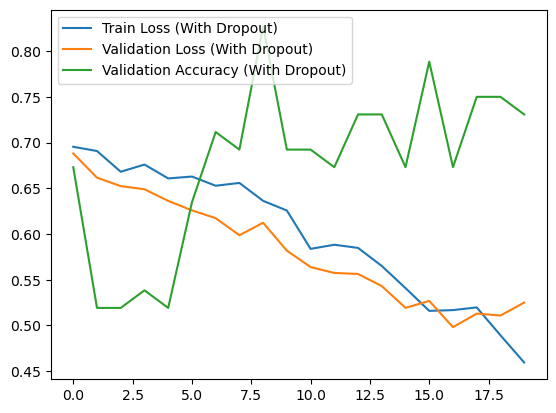

In [19]:
# Initialize and train the model with dropout
model_with_dropout = SimpleNNWithDropout()
optimizer = optim.Adam(model_with_dropout.parameters(), lr=0.001)

train_losses_with_dropout, val_losses_with_dropout, val_accuracies_with_dropout = train_model(
    model_with_dropout, train_loader, test_loader, criterion, optimizer, epochs=20
)

# Plot training and validation loss and accuracy (With Dropout)
plt.plot(train_losses_with_dropout, label="Train Loss (With Dropout)")
plt.plot(val_losses_with_dropout, label="Validation Loss (With Dropout)")
plt.plot(val_accuracies_with_dropout, label="Validation Accuracy (With Dropout)")
plt.legend()
plt.show()

#### 8.3: L1, L2 Regularization
- Both L1 and L2 help prevent overfitting by adding a penalty to the cost function for large weights
- L1 regularization is also known as Lasso Regression
- L2 regularization is also known as Ridge Regression

##### Train a Neural Network With L2 Regularization

Epoch 1/40, Train Loss: 0.6938, Val Loss: 0.6891, Val Accuracy: 0.5192
Epoch 2/40, Train Loss: 0.6894, Val Loss: 0.6760, Val Accuracy: 0.5192
Epoch 3/40, Train Loss: 0.6855, Val Loss: 0.6781, Val Accuracy: 0.5192
Epoch 4/40, Train Loss: 0.6851, Val Loss: 0.6728, Val Accuracy: 0.5192
Epoch 5/40, Train Loss: 0.6834, Val Loss: 0.6740, Val Accuracy: 0.5192
Epoch 6/40, Train Loss: 0.6826, Val Loss: 0.6734, Val Accuracy: 0.5192
Epoch 7/40, Train Loss: 0.6814, Val Loss: 0.6707, Val Accuracy: 0.5192
Epoch 8/40, Train Loss: 0.6819, Val Loss: 0.6678, Val Accuracy: 0.5192
Epoch 9/40, Train Loss: 0.6822, Val Loss: 0.6662, Val Accuracy: 0.5192
Epoch 10/40, Train Loss: 0.6801, Val Loss: 0.6693, Val Accuracy: 0.5192
Epoch 11/40, Train Loss: 0.6792, Val Loss: 0.6671, Val Accuracy: 0.5192
Epoch 12/40, Train Loss: 0.6773, Val Loss: 0.6657, Val Accuracy: 0.5192
Epoch 13/40, Train Loss: 0.6774, Val Loss: 0.6611, Val Accuracy: 0.5192
Epoch 14/40, Train Loss: 0.6743, Val Loss: 0.6627, Val Accuracy: 0.5192
E

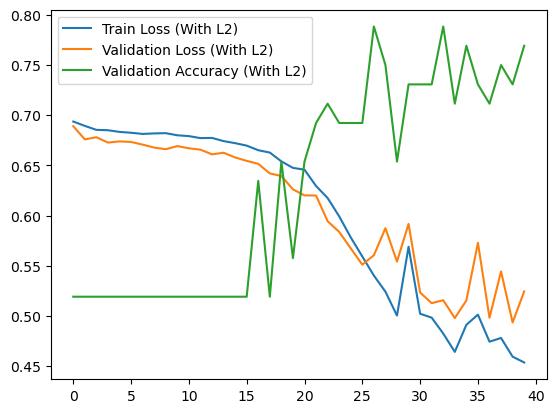

In [22]:
# Initialize and train the model with L2 regularization
model_with_l2 = NeuralNet()
optimizer = optim.Adam(model_with_l2.parameters(), lr=0.001, weight_decay=0.04) # weight decay parameter is used for L2 regularization

train_losses_with_l2, val_losses_with_l2, val_accuracies_with_l2 = train_model(
    model_with_l2, train_loader, test_loader, criterion, optimizer, epochs=40
)

# Plot training and validation loss and accuracy (With Dropout)
plt.plot(train_losses_with_l2, label="Train Loss (With L2)")
plt.plot(val_losses_with_l2, label="Validation Loss (With L2)")
plt.plot(val_accuracies_with_l2, label="Validation Accuracy (With L2)")
plt.legend()
plt.show()

In [23]:
# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=20):
    train_losses, val_losses, val_accuracies = [], [], []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        y_pred, y_true = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                y_pred.extend(predicted.cpu().numpy())
                y_true.extend(labels.cpu().numpy())
        val_losses.append(val_loss / len(val_loader))
        val_accuracy = accuracy_score(y_true, y_pred)
        val_accuracies.append(val_accuracy)
        
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}")
    
    return train_losses, val_losses, val_accuracies

Epoch 1/40, Train Loss: 0.6943, Val Loss: 0.6721, Val Accuracy: 0.5192
Epoch 2/40, Train Loss: 0.6783, Val Loss: 0.6530, Val Accuracy: 0.5192
Epoch 3/40, Train Loss: 0.6638, Val Loss: 0.6400, Val Accuracy: 0.5769
Epoch 4/40, Train Loss: 0.6480, Val Loss: 0.6321, Val Accuracy: 0.6731
Epoch 5/40, Train Loss: 0.6287, Val Loss: 0.6003, Val Accuracy: 0.6538
Epoch 6/40, Train Loss: 0.5903, Val Loss: 0.5910, Val Accuracy: 0.7692
Epoch 7/40, Train Loss: 0.5589, Val Loss: 0.5511, Val Accuracy: 0.6731
Epoch 8/40, Train Loss: 0.5368, Val Loss: 0.5668, Val Accuracy: 0.7692
Epoch 9/40, Train Loss: 0.4893, Val Loss: 0.5197, Val Accuracy: 0.7308
Epoch 10/40, Train Loss: 0.4666, Val Loss: 0.5264, Val Accuracy: 0.7885
Epoch 11/40, Train Loss: 0.4751, Val Loss: 0.5472, Val Accuracy: 0.7500
Epoch 12/40, Train Loss: 0.4378, Val Loss: 0.4784, Val Accuracy: 0.7308
Epoch 13/40, Train Loss: 0.4139, Val Loss: 0.5243, Val Accuracy: 0.7500
Epoch 14/40, Train Loss: 0.3806, Val Loss: 0.4562, Val Accuracy: 0.7500
E

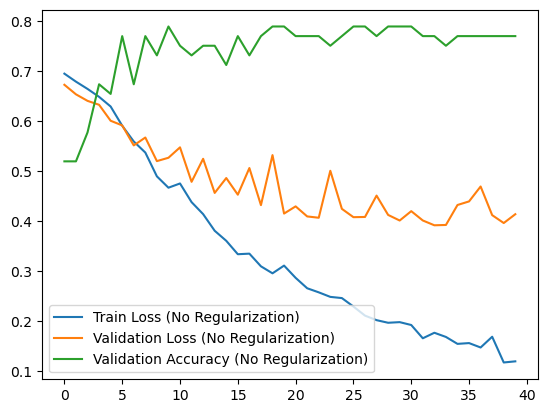

In [24]:
# Initialize and train the model without dropout
model_without_reg = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_without_reg.parameters(), lr=0.001)

train_losses_no_reg, val_losses_no_reg, val_accuracies_no_reg = train_model(
    model_without_reg, train_loader, test_loader, criterion, optimizer, epochs=40
)

# Plot training and validation loss and accuracy (Without Dropout)
plt.plot(train_losses_no_reg, label="Train Loss (No Regularization)")
plt.plot(val_losses_no_reg, label="Validation Loss (No Regularization)")
plt.plot(val_accuracies_no_reg, label="Validation Accuracy (No Regularization)")
plt.legend()
plt.show()

Epoch 1/40, Train Loss: 0.6925, Val Loss: 0.6701, Val Accuracy: 0.5192
Epoch 2/40, Train Loss: 0.6839, Val Loss: 0.6726, Val Accuracy: 0.5192
Epoch 3/40, Train Loss: 0.6845, Val Loss: 0.6669, Val Accuracy: 0.5192
Epoch 4/40, Train Loss: 0.6805, Val Loss: 0.6721, Val Accuracy: 0.5192
Epoch 5/40, Train Loss: 0.6801, Val Loss: 0.6665, Val Accuracy: 0.5192
Epoch 6/40, Train Loss: 0.6766, Val Loss: 0.6633, Val Accuracy: 0.5192
Epoch 7/40, Train Loss: 0.6774, Val Loss: 0.6611, Val Accuracy: 0.5192
Epoch 8/40, Train Loss: 0.6728, Val Loss: 0.6598, Val Accuracy: 0.5192
Epoch 9/40, Train Loss: 0.6706, Val Loss: 0.6545, Val Accuracy: 0.5192
Epoch 10/40, Train Loss: 0.6681, Val Loss: 0.6526, Val Accuracy: 0.5192
Epoch 11/40, Train Loss: 0.6625, Val Loss: 0.6485, Val Accuracy: 0.5385
Epoch 12/40, Train Loss: 0.6579, Val Loss: 0.6431, Val Accuracy: 0.6346
Epoch 13/40, Train Loss: 0.6491, Val Loss: 0.6368, Val Accuracy: 0.6923
Epoch 14/40, Train Loss: 0.6419, Val Loss: 0.6240, Val Accuracy: 0.6731
E

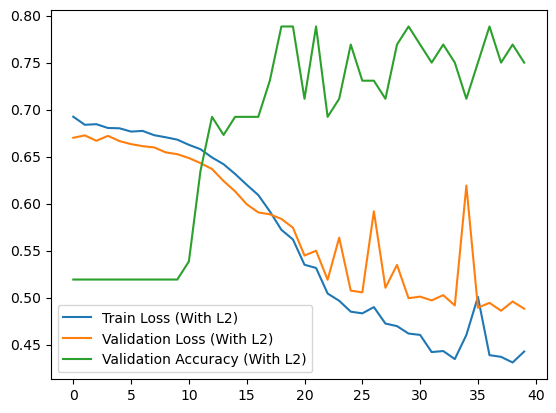

In [25]:
# Initialize and train the model with L2 regularization
model_with_l2 = NeuralNet()
optimizer = optim.Adam(model_with_l2.parameters(), lr=0.001, weight_decay=0.04) # weight decay parameter is used for L2 regularization

train_losses_with_l2, val_losses_with_l2, val_accuracies_with_l2 = train_model(
    model_with_l2, train_loader, test_loader, criterion, optimizer, epochs=40
)

# Plot training and validation loss and accuracy (With Dropout)
plt.plot(train_losses_with_l2, label="Train Loss (With L2)")
plt.plot(val_losses_with_l2, label="Validation Loss (With L2)")
plt.plot(val_accuracies_with_l2, label="Validation Accuracy (With L2)")
plt.legend()
plt.show()

#### 8.4: Batch Normalization
- Batch Normalization (BN) is a technique used in training deep neural networks to stabilize and accelerate the learning process. It also helps with regularization.
- Key Benefit
  1. Stabilize learning
  2. Higher Learning rate
  3. Regularization effect
- Batch normalization normalizes layer inputs to have zero mean and unit variance, enhancing model performance.
- Allows for higher learning rates, reducing the training time for deep networks.
- Adds robustness to model initialization, making it less sensitive to initial weights.
- Reduces overfitting, particularly when used with dropout, by adding slight regularization effects.
- Learnable parameters gamma (scale) and beta (shift) allow the network to learn the optimal scale and mean for each feature.

#### 8.5: Early Stopping
- Early Stopping monitors model performance on validation data to stop training when there is no further improvement for some fixed number of iterations.
- This parameter of fixed number of iterations with no improvement is called patience.
- It prevents overfitting by halting training before the model starts to memorize noise.
- Saves time and resources by avoiding unnecessary training epochs.